In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importing accidents dataset.
accidents_df = pd.read_csv("./archive/US_Accidents_March23.csv")

## 1) Cleaning Anomalous Data

### Distance

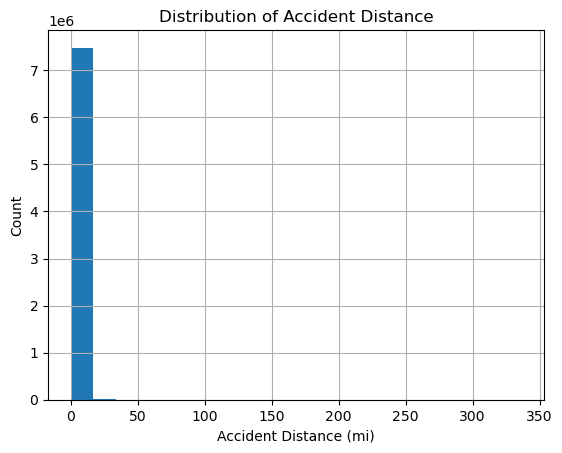

In [84]:
# Inspecting accident distance data.
accidents_df["Distance(mi)"].hist(bins=20)
plt.xlabel("Accident Distance (mi)")
plt.ylabel("Count")
plt.title("Distribution of Accident Distance")
plt.show()
# Extremely large anomalies skewing the dataset.

In [4]:
# Checking highest accident distance values.
accidents_df.sort_values("Distance(mi)",ascending=False).head(10).Description.tolist()
# Values span entire states.
# Possibly incorrect?

['Lane blocked due to accident on US-93 both ways from US-50 Great Basin Blvd to I-80 Exits 352 352A.',
 'Right lane closed due to crash on I-10 Westbound from Exits 239A 239B Louisa St to Exit 29 Lake Shore Dr.',
 'Accident on I-95 Southbound from Exit 77 Hodges Chapel Rd to Exit 68 SC-61 Augusta Hwy.',
 'Two lanes blocked due to accident on I-25 both ways between Exit 293 County Hwy-126 5 and Exit 213 I-70.',
 'Single alternate line traffic due to accident on US-93 Great Basin Hwy both ways from 6th St to US-93-ALT.',
 'Queueing traffic and left lane closed due to accident on I-70 Eastbound between Exit 52 MO-T and Exit 203 MO-W.',
 'Accident on US-101 El Camino Real Northbound between Exits 47B 47C Wendy Dr and Exit 189 4th St.',
 'Left lane blocked due to accident on US-30 both ways from T Ave to Exit 142 X Ave.',
 'Left lane blocked due to accident on I-76 Eastbound between Irwin and Pittsburgh.',
 'Main roadway closed due to crash on US-285 both ways from Mccue Rd to Gonzales Loo

In [5]:
# Reading verbal descriptions to check distances.
accidents_df.sort_values("Distance(mi)",ascending=False).head(10).Description.tolist()
# Incredibly, each distance is correct.
# Dataset simply happens to contain accidents that closed off hundreds of miles of highway lanes.

['Lane blocked due to accident on US-93 both ways from US-50 Great Basin Blvd to I-80 Exits 352 352A.',
 'Right lane closed due to crash on I-10 Westbound from Exits 239A 239B Louisa St to Exit 29 Lake Shore Dr.',
 'Accident on I-95 Southbound from Exit 77 Hodges Chapel Rd to Exit 68 SC-61 Augusta Hwy.',
 'Two lanes blocked due to accident on I-25 both ways between Exit 293 County Hwy-126 5 and Exit 213 I-70.',
 'Single alternate line traffic due to accident on US-93 Great Basin Hwy both ways from 6th St to US-93-ALT.',
 'Queueing traffic and left lane closed due to accident on I-70 Eastbound between Exit 52 MO-T and Exit 203 MO-W.',
 'Accident on US-101 El Camino Real Northbound between Exits 47B 47C Wendy Dr and Exit 189 4th St.',
 'Left lane blocked due to accident on US-30 both ways from T Ave to Exit 142 X Ave.',
 'Left lane blocked due to accident on I-76 Eastbound between Irwin and Pittsburgh.',
 'Main roadway closed due to crash on US-285 both ways from Mccue Rd to Gonzales Loo

### Air Pressure

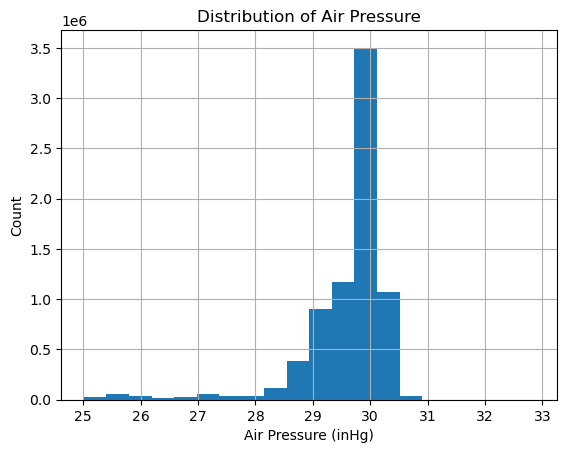

In [90]:
# Inspecting air pressure data
accidents_df["Pressure(in)"].hist(bins=20)
plt.xlabel("Air Pressure (inHg)")
plt.ylabel("Count")
plt.title("Distribution of Air Pressure")
plt.show()
# Mean of approx. 30 is as expected given average sea level air pressure.
# However, the minimum and maximum appear to be wildly unlikely.

In [7]:
# Inspecting air pressure data numerically
accidents_df["Pressure(in)"].describe()
# The maximum reported pressure is nearly double the standard.
# The minimum reported pressure is the literal vacuum of space.
# The air pressure (in inches of mercury) should nearly never exceed 31 or go below 29.
# Values outside this range should cause symptoms varying from migranes to instant death.

# Data might be wrong.

count    7.587715e+06
mean     2.953899e+01
std      1.006190e+00
min      0.000000e+00
25%      2.937000e+01
50%      2.986000e+01
75%      3.003000e+01
max      5.863000e+01
Name: Pressure(in), dtype: float64

In [8]:
# Inspecting the lowest pressure values.
accidents_df.sort_values("Pressure(in)")[["Pressure(in)","Wind_Speed(mph)","Description"]].head(10)
# Here we can see a reported pressure of 0 inHg and a reported wind speed of 13 mph.

# No.

,Pressure(in),Wind_Speed(mph),Description
7384808,0.00,NaN,At US-74/Exit 14 - Accident. Right lane blocked.
4679217,0.00,13.0,Incident on I-95 SB near MM 312 Drive with cau...
2191657,0.00,8.1,Accident on Spencer Rd near Rawhide Rd.
3561894,0.02,5.8,Between CR-59/Exit 200 and US-31/Exit 186 - Ac...
116969,0.12,NaN,Accident on Ken Austin Pkwy at County Hwy-493 ...
2576814,0.29,10.4,Accident on Colorado St Southbound at I-10.
2576812,0.29,12.7,Accident on Zarzamora St at Applewhite Rd.
3278186,0.30,12.7,Accident on CA-60 Eastbound at Exit 26 CA-57.
3278161,0.30,11.5,Two lanes blocked due to accident on I-10 West...
3278170,0.30,11.5,Accident on CA-57 Northbound at Exit 14 Brea C...


In [9]:
# Inspecting the highest pressure values
accidents_df.sort_values("Pressure(in)", ascending=False)[["Pressure(in)","Wind_Speed(mph)","Description"]].head(10)
# No mention of extremely anomalous pressure can be found in the description.
# Presumed to be completely inaccurate

,Pressure(in),Wind_Speed(mph),Description
4125536,58.63,17.0,Slow traffic on US-19 Alt S - FL-595 from FL-6...
4482572,58.63,17.0,Incident on KEENE RD S near MEADOW LN Drive wi...
3834178,58.63,17.0,Incident on INDIAN ROCKS RD near OAKWOOD DR Dr...
5215328,58.63,17.0,Stationary traffic on US-19 Alt S - FL-595 fro...
4350807,58.63,17.0,Stationary traffic on US-19 Alt S - FL-595 fro...
5189564,58.63,17.0,Stationary traffic on US-19 Alt S - FL-595 fro...
5271475,58.63,17.0,Stationary traffic on US-19 Alt S - FL-595 fro...
3909653,58.63,17.0,Slow traffic on US-19 Alt S - FL-595 from FL-6...
4324161,58.63,17.0,Stationary traffic from CR-416/W Bay Dr (India...
3997454,58.39,7.0,Accident from Crane Ave to Williams Ave.


In [10]:
# Recording size of the dataframe
accidents_df.shape

(7728394, 46)

In [11]:
# Removing anomalous pressure entries

# The all time low and high barometric pressures observed were 25.9 and 32.01 respectively
# Flitering to slightly wider than this range to be needlessly cautious.
accidents_df = accidents_df[(accidents_df["Pressure(in)"] > 25) & (accidents_df["Pressure(in)"] < 33)]

In [12]:
# Checking size of cleaned dataframe
accidents_df.shape
# Surprisingly significant loss in data...
# May merit a closer inspection later of where these errors come from.

(7489884, 46)

### Visibility

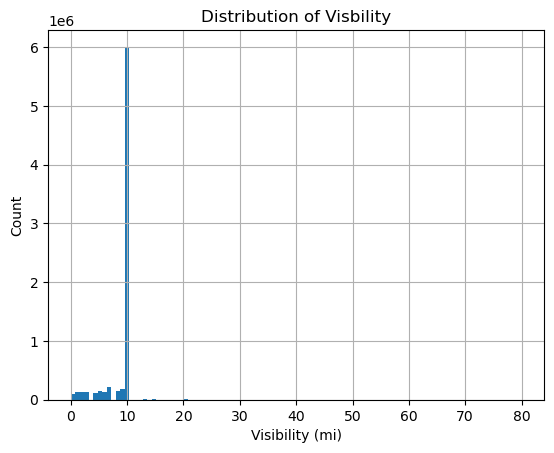

In [88]:
# Inspecting the spread of visibility through the dataset
accidents_df["Visibility(mi)"].hist(bins=100)
plt.xlabel("Visibility (mi)")
plt.ylabel("Count")
plt.title("Distribution of Visbility")
plt.show()
# Highly unusual spread.
# The overwhelming majority of values are exactly 10 miles.
# Several extremely high outliers exist.

In [14]:
# Inspecting statistics directly
accidents_df["Visibility(mi)"].describe()
# Notably, the minimum and maximum values ARE possible.
# In the absence of air pollution, 140 miles is considered the upper limit of visibility for states on the west coast.

count    7.445112e+06
mean     9.088725e+00
std      2.612026e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64

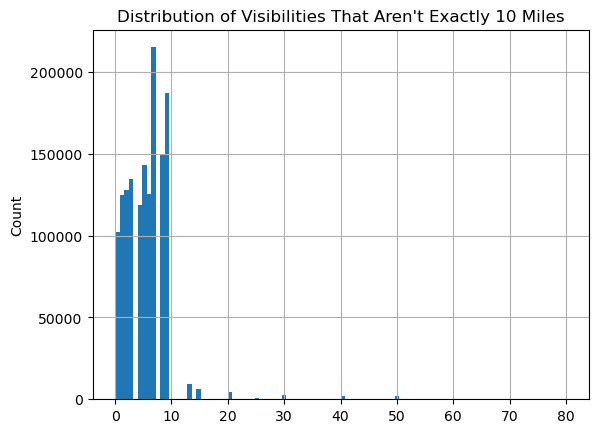

1456077 accident entries have visibilities other than 10 listed


In [87]:
# Inspecting in the absence of values that are exactly 10 miles
filtered_visibility = accidents_df[accidents_df["Visibility(mi)"] != 10]["Visibility(mi)"]
filtered_visibility.hist(bins=100)
plt.xlabel("Visibitity (mi)")
plt.ylabel("Count")
plt.title("Distribution of Visibilities That Aren't Exactly 10 Miles")
plt.show()
print(str(filtered_visibility.count()) + " accident entries have visibilities other than 10 listed")

# About 5/6 of the dataset has exactly 10 as its visibility.
# Likely due to rounding on the part of the weather stations.
# It is strongly advised to NOT USE THIS DATA.

In [57]:
# Inspecting extremely high visibility accident entries.
accidents_df[accidents_df["Visibility(mi)"] > 100][["Visibility(mi)","Description"]]
# Many of these data points are near cities and other high air pollution areas.
# Modern air pollution makes visibilities above 80 miles nearly impossible even in rural areas.
# Values above this near cities are completely impossible and should be cleaned.

,Visibility(mi),Description
220819,105.0,Right hand shoulder blocked due to accident on...
301376,111.0,Accident on Audelia Rd at Walnut St.
301379,111.0,#1 &amp; #2 lane blocked due to accident on I-...
2046902,101.0,Accident on CA-88 at Blue Sky Dr.
3072574,140.0,Accident on I-15 Southbound at Exit 123 I-215....
3432332,111.0,Between Jupiter Rd and US-75 - Accident.
5638426,140.0,Incident on ELKHORN BLVD EB near 26TH ST Drive...
7587605,140.0,At Mt Vernon Ave/Washington St - Accident. Car...


In [59]:
# Cleaning implausibly high visibility entries
accidents_df = accidents_df[~(accidents_df["Visibility(mi)"] > 80)]

In [ ]:
# Overall, this data dimension is EXTREMELY dubious and should be avoided if at all possible.

### Wind Speed

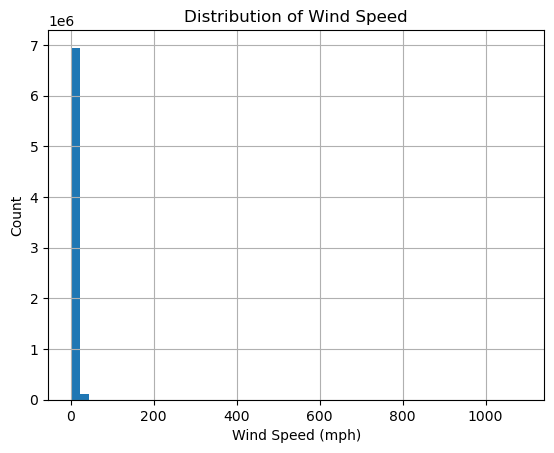

In [79]:
# Inspecting the distribution of wind speed in the dataset.
accidents_df["Wind_Speed(mph)"].hist(bins=50)
# As we might expect, most entries have relatively calm winds.
# However, a minority of outliers exist with bafflingly high wind speeds.
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Count")
plt.title("Distribution of Wind Speed")
plt.show()

In [61]:
# Inspecting the wind speed statistics directly
accidents_df["Wind_Speed(mph)"].describe()
# The maximum value in this data is approximately 1000 mph.
# ...
# Tornados have wind speeds varying from 70-200 mph.
# Tornados are capable of physically wrenching vehicles and equipment off the ground.
# A tornado of 1000 mph would be able to displace a building's foundation bars through sheer force.
# Meteorological measuring devices are fragile enough to require a human being to handle them carefully.
# I would be very impressed if any of them lived long enough to collect these values before being immediately torn to shreds for their hubris.

# Data may be wrong.

count    7.053330e+06
mean     7.677751e+00
std      5.406470e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

In [65]:
# In order to determine what value to use as a cutoff for filtering, we must inspect the outliers directly.
# Creating a view of the most extreme wind speed entries.
view = accidents_df.sort_values("Wind_Speed(mph)",ascending=False).head(500)
view.head(10)[["Wind_Speed(mph)","Description"]]
# None of these accident descriptions chose to mention supertornados being a factor in either the traffic or the accidents.
# Many of them also share the exact same values.
# The weather stations reporting these merit inspecting.

,Wind_Speed(mph),Description
6274606,1087.0,Accident from N Gurr Rd to Ashby Rd.
7092904,984.0,At SE Becker Rd/Exit 138 - Earlier accident.
3414554,822.8,At Osborne St/Exit 154 - Accident.
114588,822.8,Accident on I-5 Trk Northbound near I-5. On th...
114580,822.8,Right hand shoulder blocked due to multi-vehic...
114633,822.8,Accident on I-5 Southbound before Exit 154 Osb...
114647,822.8,Accident on I-5 Northbound near Exits 156A 156...
3414544,822.8,At CA-170 - Accident.
114640,822.8,Accident on CA-118 Westbound before Exits 42A ...
5742141,812.0,Incident on I-35E NB near NORTHSIDE DR Drive w...


In [68]:
# Viewing weather timestamp information
view[["State","City","Wind_Speed(mph)","Description","Zipcode","Weather_Timestamp","Start_Time","Source"]].head(10)
# Here we can observe that the accidents that share similarly anomalous wind speeds also share a reporting weather station.
# These accidents also have weather data collected at notably different times from the accidents.
# This highly suggests malfunctioning weather station equipment that was briefly taken down for repairs.
# Given that none of the data descriptions report a tornado or hurricane, it is advisable to remove all data with disaster-level winds.

,State,City,Wind_Speed(mph),Description,Zipcode,Weather_Timestamp,Start_Time,Source
6274606,CA,Atwater,1087.0,Accident from N Gurr Rd to Ashby Rd.,95301-5406,2021-12-16 12:45:00,2021-12-16 12:31:00,Source1
7092904,FL,Port Saint Lucie,984.0,At SE Becker Rd/Exit 138 - Earlier accident.,34953,2020-03-28 14:55:00,2020-03-28 14:49:27,Source1
3414554,CA,Pacoima,822.8,At Osborne St/Exit 154 - Accident.,91331,2016-06-13 16:53:00,2016-06-13 17:11:24,Source1
114588,CA,Sylmar,822.8,Accident on I-5 Trk Northbound near I-5. On th...,91342,2016-06-13 16:53:00,2016-06-13 18:44:57,Source2
114580,CA,Sylmar,822.8,Right hand shoulder blocked due to multi-vehic...,91342,2016-06-13 16:53:00,2016-06-13 18:28:43,Source2
114633,CA,Pacoima,822.8,Accident on I-5 Southbound before Exit 154 Osb...,91331,2016-06-13 16:53:00,2016-06-13 20:06:45,Source2
114647,CA,Mission Hills,822.8,Accident on I-5 Northbound near Exits 156A 156...,91345,2016-06-13 16:53:00,2016-06-13 20:30:47,Source2
3414544,CA,Pacoima,822.8,At CA-170 - Accident.,91331,2016-06-13 16:53:00,2016-06-13 15:58:19,Source1
114640,CA,Mission Hills,822.8,Accident on CA-118 Westbound before Exits 42A ...,91345,2016-06-13 16:53:00,2016-06-13 20:19:08,Source2
5742141,TX,Carrollton,812.0,Incident on I-35E NB near NORTHSIDE DR Drive w...,75006,2021-07-12 17:47:00,2021-07-12 17:44:46,Source1


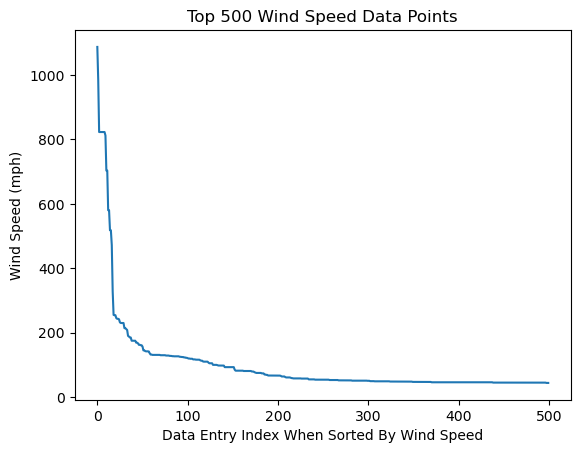

In [78]:
# Inspecting the top 500 wind speeds
plt.plot(range(500),view["Wind_Speed(mph)"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Data Entry Index When Sorted By Wind Speed")
plt.title("Top 500 Wind Speed Data Points")
plt.show()
# Here we can see that the scale of these anomalous wind speeds drops off quickly to ~50 mph.
# By excluding all wind speeds that would indicate at least a T0 tornado (>40 mph), we could clean off these values.

In [92]:
# Cleaning anomalously high wind speeds
accidents_df = accidents_df[accidents_df["Wind_Speed(mph)"] <= 40]

### Precipitation

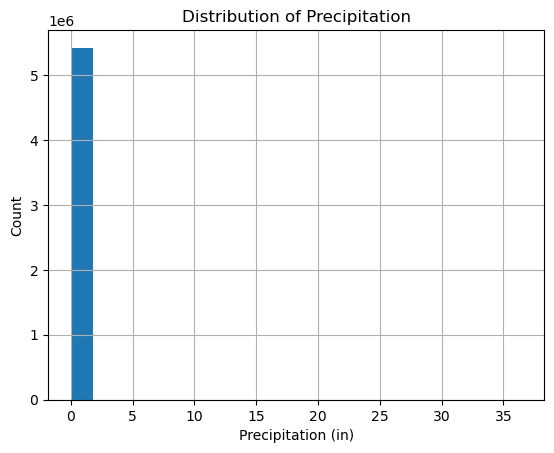

In [86]:
# Inspecting the distribution of precipitation
accidents_df["Precipitation(in)"].hist(bins=20)
plt.xlabel("Precipitation (in)")
plt.ylabel("Count")
plt.title("Distribution of Precipitation")
plt.show()
# As with the others, there are extremely high outliers in this dataset

In [93]:
# Inspecting precipitation statistics directly
accidents_df["Precipitation(in)"].describe()
# Here we can see precipitations of 36 inches in a single day.
# The U.S. record for precipitation is 49.6 inches for a specific region in Hawaii in 2018.
# This is actually within the bounds of our dataset.
# Further investigation is needed.

count    5.345546e+06
mean     8.023040e-03
std      9.509762e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.647000e+01
Name: Precipitation(in), dtype: float64

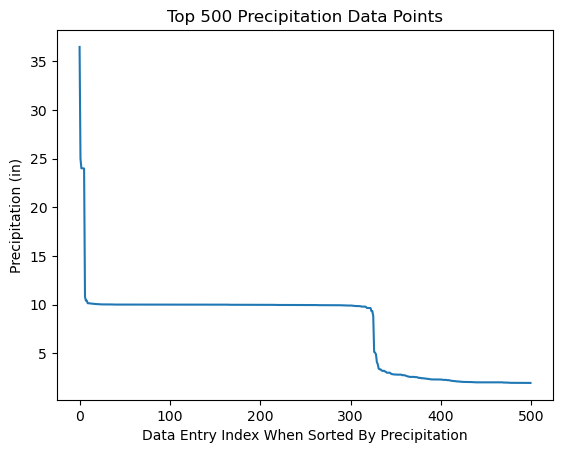

In [96]:
# Inspecting the top 500 highest precipitation values in the dataset.
plt.plot(range(500),accidents_df["Precipitation(in)"].sort_values(ascending=False).head(500))
plt.ylabel("Precipitation (in)")
plt.xlabel("Data Entry Index When Sorted By Precipitation")
plt.title("Top 500 Precipitation Data Points")
plt.show()
# Once again, values near 10 end up rounded to 10 due to imprecission in the equipment.
# The vast majority of anomalous data points can be removed by trimming off the 300 most extreme values.
# Values near this cutoff threshold are notably likely to be real values whose weather reflects their reported precipitation.

In [101]:
# Dropping anomalous precipitation values
accidents_df = accidents_df.drop(accidents_df["Precipitation(in)"].sort_values(ascending=False).head(300).index)

### NaN Values

In [82]:
# Checking which columns still have NaNs
accidents_df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3321063
End_Lng                  3321063
Distance(mi)                   0
Description                    5
Street                     10406
City                         237
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)             30672
Wind_Chill(F)            1861440
Humidity(%)                40759
Pressure(in)                   0
Visibility(mi)             44772
Wind_Direction             48087
Wind_Speed(mph)           436468
Precipitation(in)        2070212
Weather_Condition              0
Amenity                        0
Bump      

In [ ]:
# Looking at the above values, no significant amounts of NaNs are present in any data that will be used in visualizations.
# As such, it is beneficial to leave the dataset as is.

## 2) Generating Weather/Season Data

In [29]:
# Inspecting consistency of the weather data
weathers_in_df = accidents_df.Weather_Condition.astype(str).str.lower().unique()
weathers_in_df
# EXTREMELY inconsistent
# Should be binned for ease of use

array(['light rain', 'overcast', 'mostly cloudy', 'rain', 'light snow',
       'haze', 'scattered clouds', 'partly cloudy', 'clear', 'snow',
       'light freezing drizzle', 'light drizzle', 'fog', 'shallow fog',
       'heavy rain', 'light freezing rain', 'cloudy', 'drizzle', 'nan',
       'light rain showers', 'mist', 'smoke', 'patches of fog',
       'light freezing fog', 'light haze', 'light thunderstorms and rain',
       'thunderstorms and rain', 'fair', 'volcanic ash', 'blowing sand',
       'blowing dust / windy', 'widespread dust', 'fair / windy',
       'rain showers', 'mostly cloudy / windy', 'light rain / windy',
       'hail', 'heavy drizzle', 'showers in the vicinity', 'thunderstorm',
       'light rain shower', 'light rain with thunder',
       'partly cloudy / windy', 'thunder in the vicinity', 't-storm',
       'heavy thunderstorms and rain', 'thunder', 'heavy t-storm',
       'funnel cloud', 'heavy t-storm / windy', 'blowing snow',
       'light thunderstorms and snow

In [30]:
# Binning weather conditions into consistent categories
hail_set = [weather for weather in weathers_in_df if "hail" in weather] + [weather for weather in weathers_in_df if "pellets" in weather]
freezing_set = [weather for weather in weathers_in_df if "wint" in weather] + [weather for weather in weathers_in_df if "free" in weather] + [weather for weather in weathers_in_df if "sleet" in weather]
snow_set = [weather for weather in weathers_in_df if "snow" in weather]
haze_set = [weather for weather in weathers_in_df if "haze" in weather] + [weather for weather in weathers_in_df if "fog" in weather] + [weather for weather in weathers_in_df if "mist" in weather] + [weather for weather in weathers_in_df if "smoke" in weather] + [weather for weather in weathers_in_df if "dust" in weather] + [weather for weather in weathers_in_df if "sand" in weather] + [weather for weather in weathers_in_df if "ash" in weather]
storm_set = [weather for weather in weathers_in_df if "storm" in weather] + [weather for weather in weathers_in_df if "thunder" in weather] + [weather for weather in weathers_in_df if "squall" in weather]
rainy_set = [weather for weather in weathers_in_df if "rain" in weather] + [weather for weather in weathers_in_df if "shower" in weather]
drizzle_set = [weather for weather in weathers_in_df if "drizzle" in weather]
cloudy_set = [weather for weather in [weather for weather in weathers_in_df if "cloud" in weather] if weather not in  ['partly cloudy',"partly cloudy / windy"]] + ["overcast"]
clear_set = [weather for weather in weathers_in_df if "clear" in weather] + [weather for weather in weathers_in_df if "partly" in weather] + [weather for weather in weathers_in_df if "fair" in weather]
nan_set = [weather for weather in weathers_in_df if "nan" in weather] + [weather for weather in weathers_in_df if "n/a" in weather] + [np.NaN]

In [31]:
# Applying bins to the dataset
weather_groups = [hail_set,freezing_set,snow_set,haze_set,storm_set,rainy_set,drizzle_set,cloudy_set,clear_set,nan_set]
weather_bins = ["hail","freezing_rain","snow","haze","storm","rain","drizzle","cloudy","clear","non_recorded"]
accidents_df.Weather_Condition = accidents_df.Weather_Condition.str.lower()
for bin_num in range(len(weather_groups)):
    accidents_df.Weather_Condition = accidents_df.Weather_Condition.replace(weather_groups[bin_num],weather_bins[bin_num])

In [32]:
# Inspecting binned data
accidents_df.Weather_Condition.unique()
# Tornado outliers still remain in the dataset.
# They should be cleaned.

array(['rain', 'cloudy', 'snow', 'haze', 'clear', 'freezing_rain',
       'drizzle', 'non_recorded', 'storm', 'hail', 'tornado'],
      dtype=object)

In [38]:
# Filtering out outlier tornado data
accidents_df = accidents_df[~(accidents_df.Weather_Condition == "tornado")]

# Note: None of the anomalous wind speeds cleaned elsewhere in this notebook were associated with actual tornados...

In [42]:
# Checking for weather conditions not yet binned by the above code
considered_vars = hail_set + freezing_set + snow_set + storm_set + rainy_set + cloudy_set + clear_set + haze_set + drizzle_set + nan_set + ["tornado"]
[weather for weather in weathers_in_df if weather not in considered_vars]
# All accounted for!

[]

## 3) Generating Season Data

In [44]:
# Defining function to compute the season from the month
def computeSeason(date_string):
    month = int(date_string[5:7])
    if month <= 2:
        return "Winter"
    elif month <= 5:
        return "Spring"
    elif month <= 8:
        return "Summer"
    elif month <= 11:
        return "Fall"
    elif month == 12:
        return "Winter"

In [46]:
# Applying computeSeason to all remaining dates
accidents_df["Season"] = accidents_df.Start_Time.apply(computeSeason)

## 4) Exporting Completed Data

In [102]:
# Exporting the cleaned dataset
accidents_df.to_csv("./us_accidents_cleaned.csv")

**If any further cleaning of the data is needed, please contact me over Slack (or Teams if the issue is urgent)!**